<a href="https://colab.research.google.com/github/k-arun007/Machine-Learning-Based-Preemptive-Diagnosis-of-Lung-Cancer-Using-Clinical-Data/blob/main/Lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings("ignore", category=(DataConversionWarning))
warnings.filterwarnings("ignore", category=(ConvergenceWarning))

df_lc=pd.read_csv("survey lung cancer.csv")
df_lc


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [39]:
df_lc.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [40]:
df_lc.shape

(309, 16)

In [41]:
df_lc.isna().sum()


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_gender=pd.DataFrame(le.fit_transform(df_lc['GENDER']))
df_gender=df_gender.rename(columns={0:'GENDER_NEW'})
df_gender
df_lc=pd.concat([df_lc,df_gender], axis=1)
df_lc

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_NEW
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1


In [43]:
df_lc_lung_cancer=pd.DataFrame(le.fit_transform(df_lc['LUNG_CANCER']))
df_lc_lung_cancer
df_lc_lung_cancer=df_lc_lung_cancer.rename(columns={0:'LUNG_CANCER_NEW'})
df_lc_lung_cancer
df_lc=pd.concat([df_lc, df_lc_lung_cancer], axis=1)
df_lc


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_NEW,LUNG_CANCER_NEW
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1,1


In [44]:
df_lc=df_lc.drop(['GENDER','LUNG_CANCER'],axis=1)
df_lc

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_NEW,LUNG_CANCER_NEW
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,0,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,1


In [45]:
from sklearn.model_selection import train_test_split
x=df_lc.drop(['LUNG_CANCER_NEW'],axis=1)
x
y=pd.DataFrame(df_lc['LUNG_CANCER_NEW'])
y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((247, 15), (62, 15), (247, 1), (62, 1))

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
top_features= SelectKBest(score_func=chi2,k=15)
top_features.fit(x_train,y_train)
top_features_ranked=pd.DataFrame(top_features.scores_, columns={0:'FEATURE_SCORES'})
top_features_ranked=top_features_ranked.rename(columns={0:'FEATURE_SCORE'})
top=pd.concat([pd.DataFrame(x_train.columns),top_features_ranked],axis=1)
top_features_ranked=top.rename(columns={0:"FEATURE_NAME"}).nlargest(15,'FEATURE_SCORE',keep='all')
top_features_ranked

,FEATURE_NAME,FEATURE_SCORE
7,ALLERGY,4.521552
9,ALCOHOL CONSUMING,4.081441
12,SWALLOWING DIFFICULTY,3.138517
10,COUGHING,2.688603
8,WHEEZING,2.526787
0,AGE,1.846931
13,CHEST PAIN,1.696437
4,PEER_PRESSURE,1.457184
2,YELLOW_FINGERS,1.343088
6,FATIGUE,1.255540


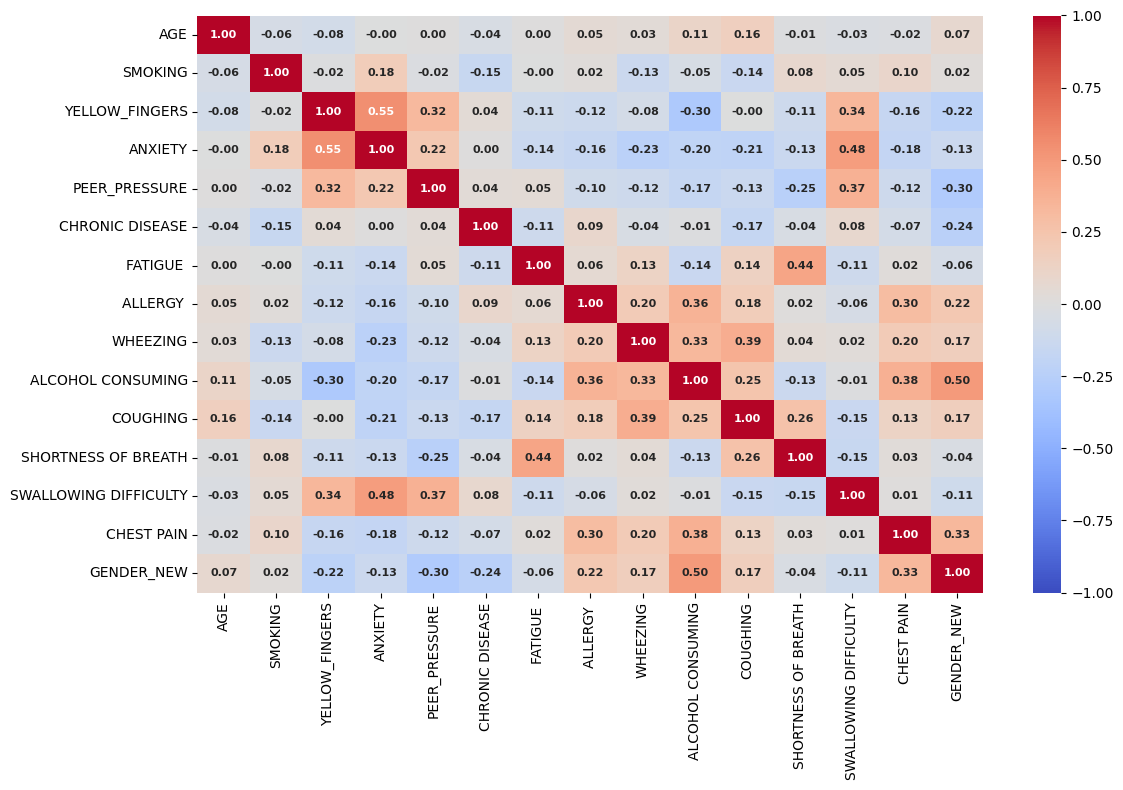

In [47]:
import matplotlib as m
m.pyplot.figure(figsize=(12,8))
df_lc_corr= x_train.corr()
sb.heatmap(df_lc_corr, annot=True, cmap="coolwarm", fmt=".2f",annot_kws={"fontsize": 8,"fontweight":"bold"},vmin=-1 , vmax=1)
m.pyplot.tight_layout()

In [48]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((247, 15), (62, 15), (247, 1), (62, 1))

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, recall_score, precision_score, matthews_corrcoef

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()

models={'lrm':lr,
         'dtm':dt,
        'rfm':rf,
        'abm':ab,
        'gbm':gb
       }

dict_score={}
array_score={}
for i in models:
    model_fit=models[i].fit(x_train, y_train)
    model_pred=model_fit.predict(x_test)
    array_score.update({"accuracy score":accuracy_score(y_test, model_pred)})
    array_score.update({"precision score":precision_score(y_test, model_pred)})
    array_score.update({"recall score":recall_score(y_test, model_pred)})
    array_score.update({"f1 score":f1_score(y_test, model_pred)})
    array_score.update({"fbeta score":fbeta_score(y_test, model_pred,beta=0.5)})
    key=models[i].__class__.__name__
    value=array_score
    dict_score.update({key:value})
    array_score={}
ds=pd.DataFrame(dict_score)
ds

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
accuracy score,0.983871,0.967742,0.967742,0.983871,0.951613
precision score,0.983607,0.983333,0.983333,0.983607,0.983051
recall score,1.000000,0.983333,0.983333,1.000000,0.966667
f1 score,0.991736,0.983333,0.983333,0.991736,0.974790
fbeta score,0.986842,0.983333,0.983333,0.986842,0.979730


In [50]:
ds.describe()


,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.989211,0.980215,0.980215,0.989211,0.971170
std,0.006861,0.006973,0.006973,0.006861,0.012553
min,0.983607,0.967742,0.967742,0.983607,0.951613
25%,0.983871,0.983333,0.983333,0.983871,0.966667
50%,0.986842,0.983333,0.983333,0.986842,0.974790
75%,0.991736,0.983333,0.983333,0.991736,0.979730
max,1.000000,0.983333,0.983333,1.000000,0.983051


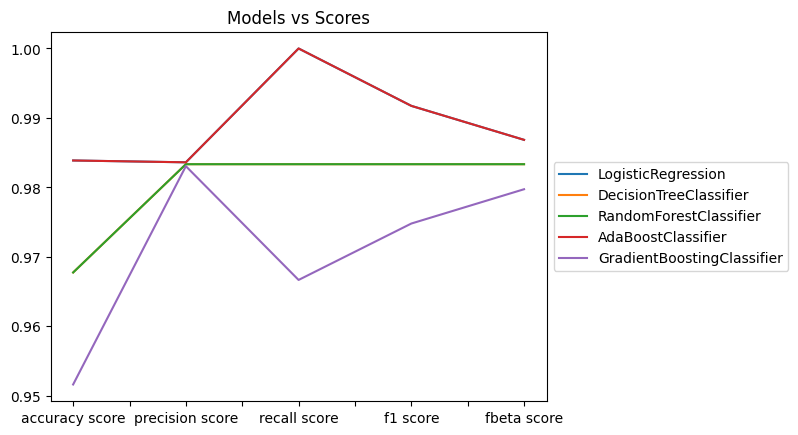

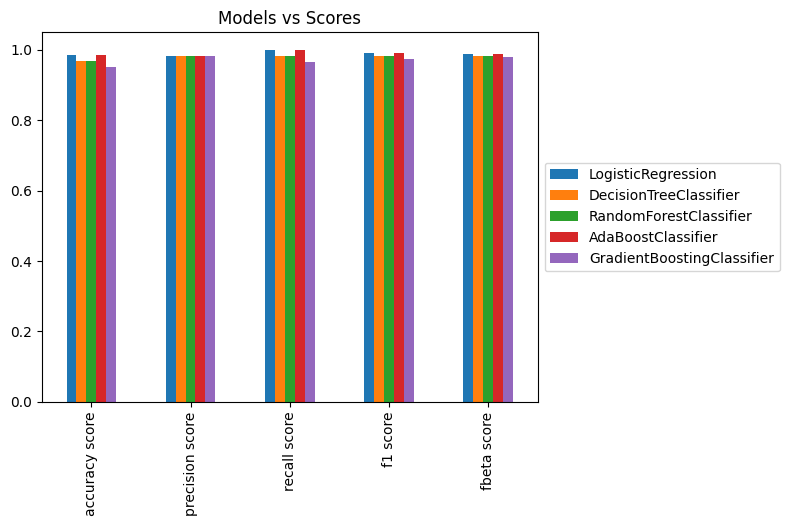

In [51]:
m.figure.Figure(figsize=(10,10))
plots=["line", "bar"]
for i in plots:
    ds.plot(kind=i,title="Models vs Scores",legend=True)
#     mp.ylim(0,1)
    mp.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mp.show()

In [16]:
print(featurescores.nlargest(4,'scores'))

   columns      scores
0     Name  145.856811
3   Smokes   66.685315
2      Age   37.662769
1  Surname   34.224393


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Print lengths for debugging
print(f"Length of fit.scores_: {len(fit.scores_)}")
print(f"Length of X1.columns: {len(X1.columns)}")

# Check if lengths match
if len(fit.scores_) == len(X1.columns):
    # Create the Series and plot
    featureview = pd.Series(fit.scores_, index=X1.columns)
    featureview.plot(kind='barh')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.title('Feature Importances')
    plt.show()
else:
    print("Mismatch in lengths of fit.scores_ and X1.columns. Please check the data.")
    # Optional: Show more detailed information for debugging
    print("Sample of fit.scores_:", fit.scores_[:10])
    print("Sample of X1.columns:", X1.columns[:10])


Length of fit.scores_: 102
Length of X1.columns: 6
Mismatch in lengths of fit.scores_ and X1.columns. Please check the data.
Sample of fit.scores_: [145.85681121  34.2243926   37.66276888  66.68531498   1.10714286
   0.90322581   1.10714286   0.90322581   1.10714286   0.90322581]
Sample of X1.columns: Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol'], dtype='object')


In [31]:
from sklearn.preprocessing import OneHotEncoder

# Assuming you used OneHotEncoder on categorical features
encoder = OneHotEncoder(sparse=False)
X1_encoded = encoder.fit_transform(X1)
feature_names = encoder.get_feature_names_out(input_features=X1.columns)

# Print lengths for debugging
print(f"Length of fit.scores_: {len(fit.scores_)}")
print(f"Length of feature_names: {len(feature_names)}")

# Check if lengths match
if len(fit.scores_) == len(feature_names):
    # Create the Series and plot
    featureview = pd.Series(fit.scores_, index=feature_names)
    featureview.plot(kind='barh')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.title('Feature Importances')
    plt.show()
else:
    print("Mismatch in lengths of fit.scores_ and feature_names. Please check the data.")
    # Optional: Show more detailed information for debugging
    print("Sample of fit.scores_:", fit.scores_[:10])
    print("Sample of feature_names:", feature_names[:10])


Length of fit.scores_: 102
Length of feature_names: 170
Mismatch in lengths of fit.scores_ and feature_names. Please check the data.
Sample of fit.scores_: [145.85681121  34.2243926   37.66276888  66.68531498   1.10714286
   0.90322581   1.10714286   0.90322581   1.10714286   0.90322581]
Sample of feature_names: ['Name_Alec ' 'Name_Alex' 'Name_Anna' 'Name_Barbra' 'Name_Barbra '
 'Name_Camela' 'Name_Charlize ' 'Name_Charlton ' 'Name_Cristiano'
 'Name_Diane ']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
featureview=pd.Series(fit.scores_,index=X1.columns) # Use X1.columns
featureview.plot(kind='barh')

ValueError: Length of values (102) does not match length of index (6)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Print lengths for debugging
print(f"Length of fit.scores_: {len(fit.scores_)}")
print(f"Length of X1.columns: {len(X1.columns)}")

# Print a sample of the values to debug
print("Sample of fit.scores_:", fit.scores_[:10])
print("Sample of X1.columns:", X1.columns[:10])



Length of fit.scores_: 102
Length of X1.columns: 6
Sample of fit.scores_: [145.85681121  34.2243926   37.66276888  66.68531498   1.10714286
   0.90322581   1.10714286   0.90322581   1.10714286   0.90322581]
Sample of X1.columns: Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol'], dtype='object')


In [37]:
from sklearn.preprocessing import OneHotEncoder

# Assuming you used OneHotEncoder on categorical features
encoder = OneHotEncoder(sparse=False)
X1_encoded = encoder.fit_transform(X1)
feature_names = encoder.get_feature_names_out(input_features=X1.columns)

# Print lengths for debugging
print(f"Length of fit.scores_: {len(fit.scores_)}")
print(f"Length of feature_names: {len(feature_names)}")

# Check if lengths match with the encoded feature names
if len(fit.scores_) == len(feature_names):
    # Create the Series with correct feature names
    featureview = pd.Series(fit.scores_, index=feature_names)

    # Plotting the feature importances as a histogram
    featureview.hist(bins=10)  # Adjust the number of bins as needed
    plt.xlabel('Importance Score')
    plt.ylabel('Frequency')
    plt.title('Histogram of Feature Importances')
    plt.show()
else:
    print("Mismatch in lengths of fit.scores_ and feature_names. Please check the data.")
    # Optional: Show more detailed information for debugging
    print("Sample of fit.scores_:", fit.scores_[:10])
    print("Sample of feature_names:", feature_names[:10])


Length of fit.scores_: 102
Length of feature_names: 170
Mismatch in lengths of fit.scores_ and feature_names. Please check the data.
Sample of fit.scores_: [145.85681121  34.2243926   37.66276888  66.68531498   1.10714286
   0.90322581   1.10714286   0.90322581   1.10714286   0.90322581]
Sample of feature_names: ['Name_Alec ' 'Name_Alex' 'Name_Anna' 'Name_Barbra' 'Name_Barbra '
 'Name_Camela' 'Name_Charlize ' 'Name_Charlton ' 'Name_Cristiano'
 'Name_Diane ']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
